# AdaBoost - Classification:

### Employee Attrition Prediction:
- In this project, we aim to predict employee attrition using a dataset that includes various factors such as job role, education, and satisfaction levels. Attrition refers to employees leaving the company, either voluntarily or involuntarily. By analyzing patterns in the data, we can identify key factors that contribute to attrition and build a classification model using the AdaBoost algorithm to make predictions. This can help organizations better understand employee retention and improve workforce management strategies.

# Importing the required libraries:

In [825]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, root_mean_squared_error


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [827]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [829]:
df.shape

(1470, 35)

In [831]:
df.isnull().sum().any()

False

In [833]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [837]:
 # df.columns

In [839]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [841]:
round(100*df.Attrition.value_counts()[1]/len(df),3 )

16.122

The class seems to be impalanced so we will try SMOTE further.

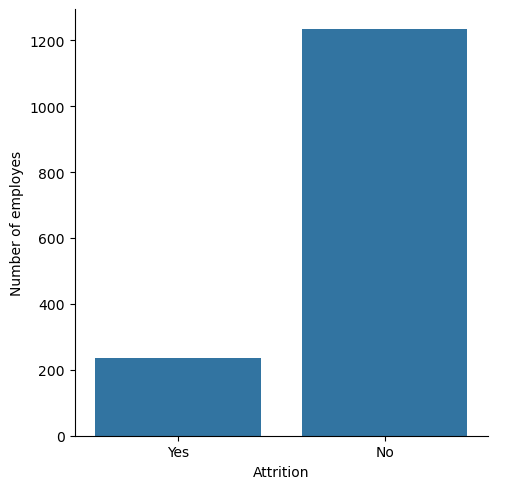

In [844]:
sns.catplot(data=df, x='Attrition', kind='count')
plt.xlabel('Attrition')
plt.ylabel('Number of employes')
plt.show()

In [845]:
num_vars = df.select_dtypes(include='number')
cat_vars = df.select_dtypes(include='object')

In [848]:
len(num_vars.columns)

26

In [850]:
len(cat_vars.columns)

9

In [852]:
cat_vars.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [854]:
# Mapping the target columns with 0 and 1:

df['Attrition'] = df.Attrition.map({'Yes':1, 'No':0})
df.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [856]:
cat_vars_columns = cat_vars.columns[1:]

In [858]:
cat_vars_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [860]:
# We will have to do numeric encoding on the categorical vars and we would avoid the target column in this numeric encoding:


dummies_df = pd.get_dummies(df[cat_vars_columns], drop_first=True, dtype='int')
dummies_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [862]:
type(cat_vars_columns)

pandas.core.indexes.base.Index

In [864]:
df.shape

(1470, 35)

In [866]:
len(cat_vars_columns)

8

In [868]:
df = df.drop(list(cat_vars_columns), axis=1)
df.shape

(1470, 27)

In [870]:
df = pd.concat([df, dummies_df], axis=1)
df.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0


In [872]:
y = df.pop('Attrition')
X = df

In [874]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int64

In [876]:
y.shape

(1470,)

In [878]:
X.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0


In [880]:
X.shape

(1470, 47)

In [882]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [884]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 1041 to 1110
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                441 non-null    int64
 1   DailyRate                          441 non-null    int64
 2   DistanceFromHome                   441 non-null    int64
 3   Education                          441 non-null    int64
 4   EmployeeCount                      441 non-null    int64
 5   EmployeeNumber                     441 non-null    int64
 6   EnvironmentSatisfaction            441 non-null    int64
 7   HourlyRate                         441 non-null    int64
 8   JobInvolvement                     441 non-null    int64
 9   JobLevel                           441 non-null    int64
 10  JobSatisfaction                    441 non-null    int64
 11  MonthlyIncome                      441 non-null    int64
 12  MonthlyRate            

__NOTE: No Scaling is required in Boosting algos.__

In [887]:
# scaler = StandardScaler()

# Xtrain = scaler.fit_transform(Xtrain)
# Xtest = scaler.transform(Xtest)

In [889]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1029, 47)
(441, 47)
(1029,)
(441,)


In [891]:
smote = SMOTE(random_state=42)
Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)
print(Xtrain.shape)
print(ytrain.shape)

(1706, 47)
(1706,)


In [893]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [895]:
Xtrain.shape

(1706, 47)

In [897]:
ytrain.value_counts()

Attrition
0    853
1    853
Name: count, dtype: int64

## Model building:

## AdaBoost Classifier:

In [901]:
adaboost_model = AdaBoostClassifier(n_estimators=200, random_state=42)

adaboost_model.fit(Xtrain, ytrain)

ypred_train = adaboost_model.predict(Xtrain)
ypred_test = adaboost_model.predict(Xtest)

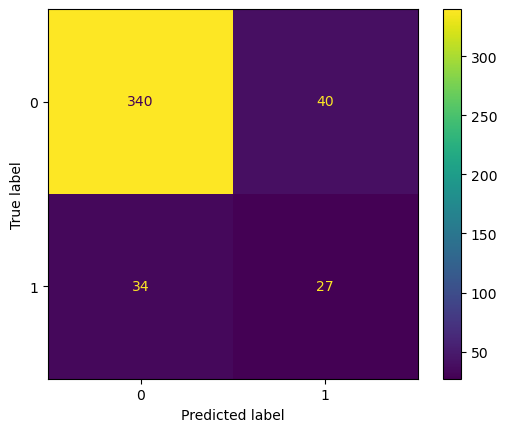

In [902]:
cm = metrics.confusion_matrix(ytest, ypred_test)
ConfusionMatrixDisplay(cm).plot()

In [903]:
print(accuracy_score(ytrain, ypred_train))
print(accuracy_score(ytest, ypred_test))

0.9501758499413834
0.8321995464852607


In [907]:
print(recall_score(ytrain, ypred_train))
print(recall_score(ytest, ypred_test))

0.9378663540445487
0.4426229508196721


We can see the our model is highly overfitting.<br>
__NOTE:-__ We gave __n_estimators=200__ and these boosting algos, no matter what, won't stop early and will do all the 200 estimators.

Let's do GridSearcCV to find the best set of hyperparameters.

In [910]:
adaboost_model.__dict__

{'estimator': None,
 'n_estimators': 200,
 'estimator_params': (),
 'learning_rate': 1.0,
 'random_state': 42,
 'algorithm': 'SAMME.R',
 'feature_names_in_': array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
        'BusinessTravel_Travel_Rarely',
        'Department_Research & Development', 'Department_Sales',
        'EducationField_Life Sciences', 'EducationField_Marketing',
        'EducationField_Medical', 'EducationField_Other',
        '

In [912]:
param_space = {'n_estimators':[5,20,35,50,65,80,95,110,125,140,155,170, 185, 200, 215, 230, 245, 260, 275, 290, 305, 320],
               'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
               'algorithm' : ['SAMME', 'SAMME.R']
              }

adaboost_model_1 = AdaBoostClassifier(random_state=42)

grid_model = GridSearchCV(estimator=adaboost_model_1, 
                          param_grid=param_space, 
                          n_jobs=-1, 
                          return_train_score=True, 
                          cv=5, 
                          verbose=1, 
                          scoring='f1')

grid_model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 308 candidates, totalling 1540 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1],
                         'n_estimators': [5, 20, 35, 50, 65, 80, 95, 110, 125,
                                          140, 155, 170, 185, 200, 215, 230,
                                          245, 260, 275, 290, 305, 320]},
             return_train_score=True, scoring='f1', verbose=1)

In [913]:
grid_model.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 20}

In [914]:
grid_model.best_score_

0.8441317446304035

In [915]:
best_model = grid_model.best_estimator_
best_model

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=20,
                   random_state=42)

In [916]:
ypred_train_1 = best_model.predict(Xtrain)
ypred_test_1 = best_model.predict(Xtest)

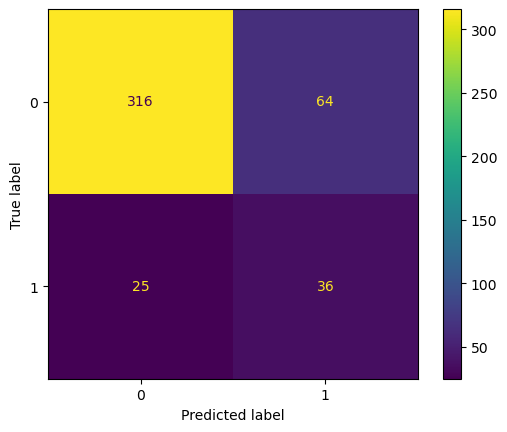

In [917]:
cm = metrics.confusion_matrix(ytest, ypred_test_1)
ConfusionMatrixDisplay(cm).plot()

In [918]:
print(accuracy_score(ytrain, ypred_train_1))
print(accuracy_score(ytest, ypred_test_1))
print(recall_score(ytrain, ypred_train_1))
print(recall_score(ytest, ypred_test_1))

0.8581477139507621
0.7981859410430839
0.8757327080890973
0.5901639344262295


### IMP Note:

__Relationship between the LR and the ```n_estimators____<br>
As the learning becomes smaller, we need more n_estimators to work on our problem as with a small learning rate, each individual estimator willhave a very small contribution in the final predicton.

---------------

---------------

# AdaBoost - Regression:

In [923]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [924]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [925]:
df.shape

(21613, 21)

In [926]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [927]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Lets' see if we have any correlation amongst our independent variables in our dataset:

In [929]:
num_vars = df.select_dtypes(include='number')
num_vars.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [930]:
type(num_vars)

pandas.core.frame.DataFrame

In [931]:
num_vars = num_vars.columns[2:]
num_vars 

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [932]:
num_vars = df[num_vars]
num_vars.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [933]:
df.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

## Let's do EDA:

Text(0, 0.5, 'price')

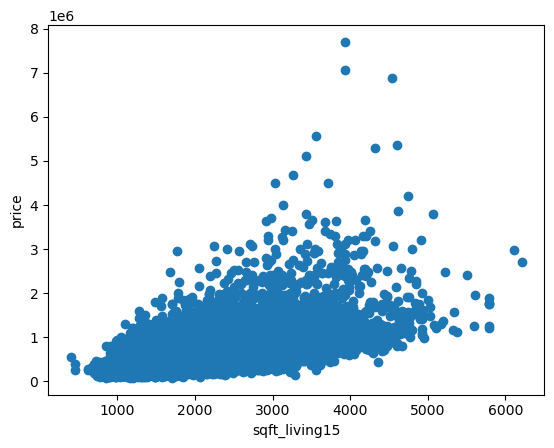

In [935]:
plt.scatter(x='sqft_living15', y='price', data=df)
plt.xlabel('sqft_living15')
plt.ylabel('price')

Text(0, 0.5, 'price')

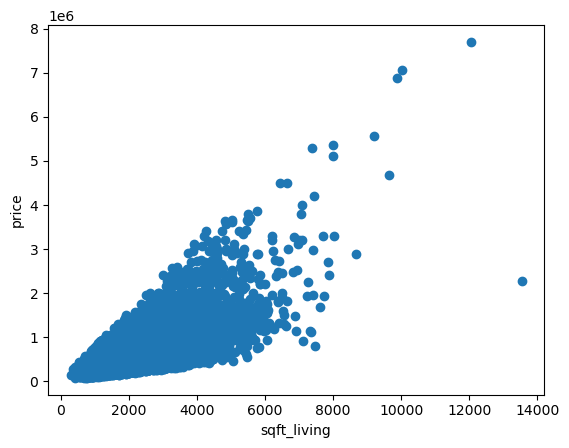

In [936]:
plt.scatter(x='sqft_living', y='price', data=df)
plt.xlabel('sqft_living')
plt.ylabel('price')

Text(0, 0.5, 'price')

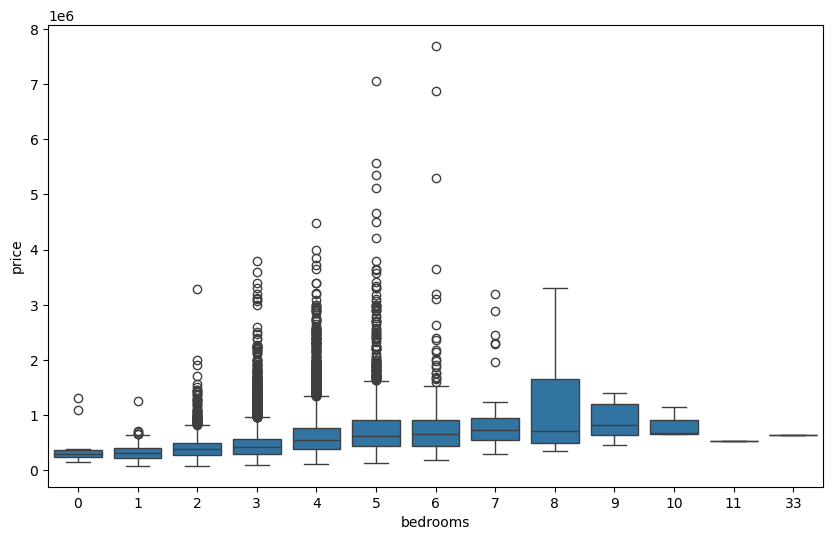

In [937]:
plt.figure(figsize=[10, 6])
sns.boxplot(x='bedrooms', y='price', data=df)
plt.xlabel('bedrooms')
plt.ylabel('price')

Text(0, 0.5, 'price')

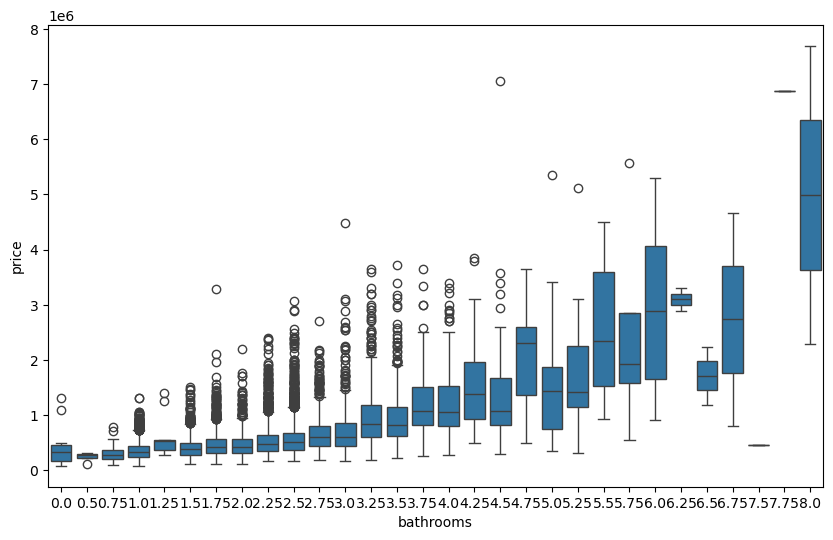

In [938]:
plt.figure(figsize=[10, 6])
sns.boxplot(x='bathrooms', y='price', data=df)
plt.xlabel('bathrooms')
plt.ylabel('price')

Text(0, 0.5, 'price')

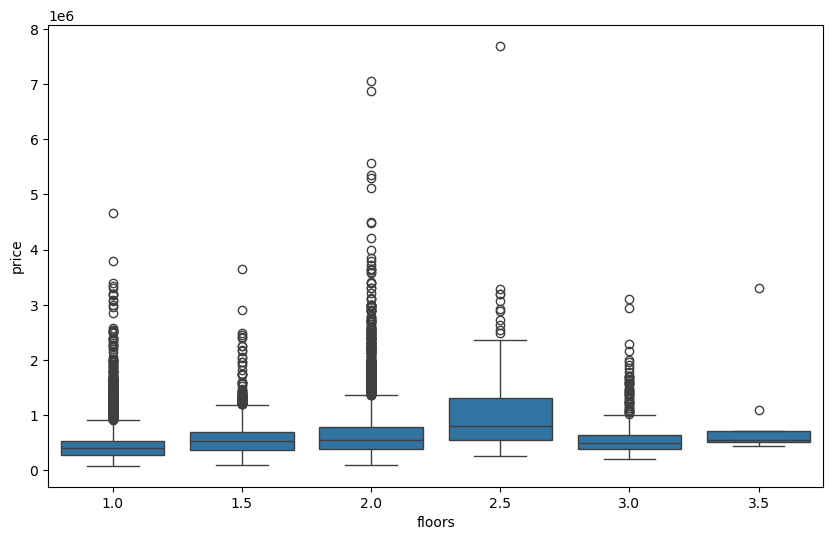

In [939]:
plt.figure(figsize=[10, 6])
sns.boxplot(x='floors', y='price', data=df)
plt.xlabel('floors')
plt.ylabel('price')

In [940]:
# sns.pairplot(df)
# plt.show()

<Axes: >

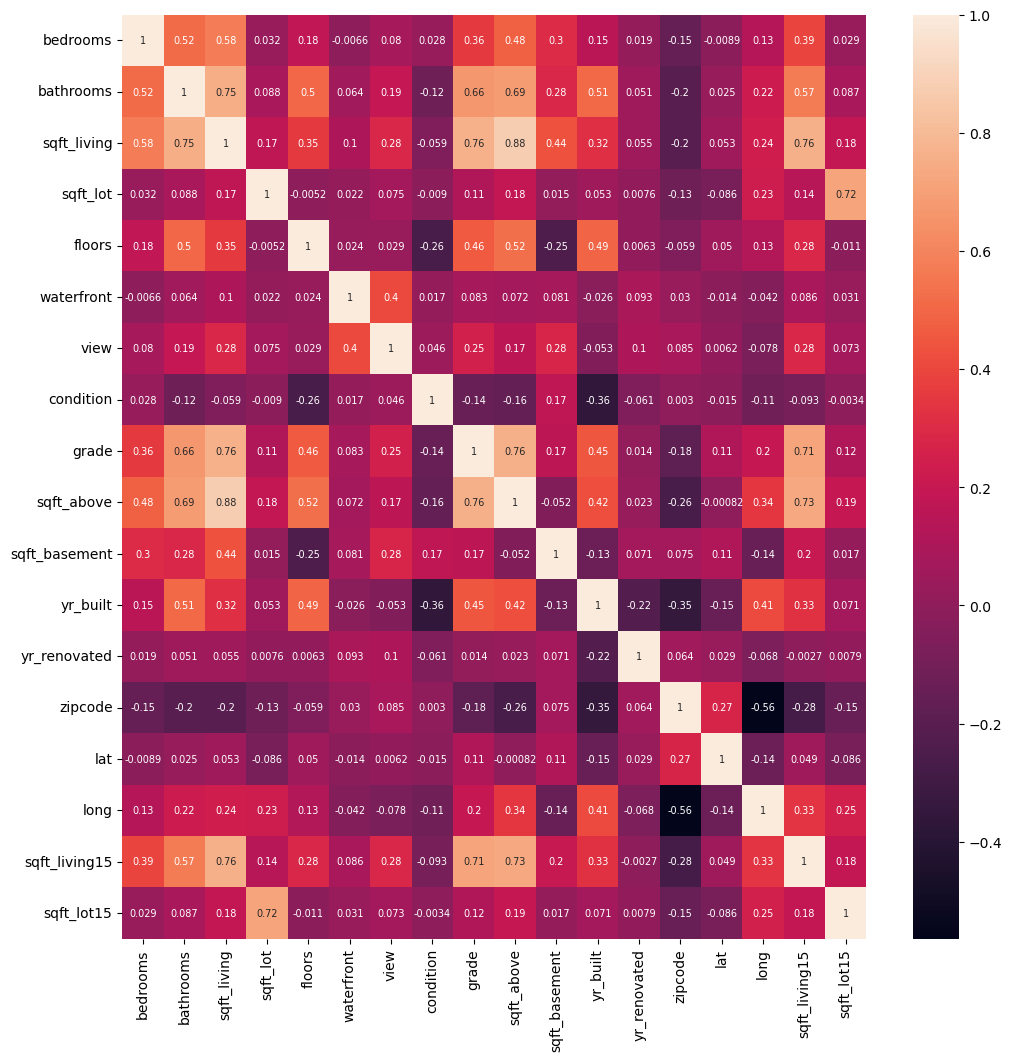

In [941]:
plt.figure(figsize=[12, 12])
sns.heatmap(num_vars.corr(), annot=True, annot_kws={'size':7})

In [942]:
num_vars.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [943]:
df_filtered = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'waterfront', 'yr_built', 'lat', 'bedrooms', 'long']]
df_filtered

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
0,1180,7,1180,1340,1.00,0,0,0,1955,47.5112,3,-122.257
1,2570,7,2170,1690,2.25,0,400,0,1951,47.7210,3,-122.319
2,770,6,770,2720,1.00,0,0,0,1933,47.7379,2,-122.233
3,1960,7,1050,1360,3.00,0,910,0,1965,47.5208,4,-122.393
4,1680,8,1680,1800,2.00,0,0,0,1987,47.6168,3,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,1530,2.50,0,0,0,2009,47.6993,3,-122.346
21609,2310,8,2310,1830,2.50,0,0,0,2014,47.5107,4,-122.362
21610,1020,7,1020,1020,0.75,0,0,0,2009,47.5944,2,-122.299
21611,1600,8,1600,1410,2.50,0,0,0,2004,47.5345,3,-122.069


In [944]:
y = df.pop('price')
X = df_filtered

In [945]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

__NOTE: No Scaling is required in Boosting algos.__

In [947]:
# scaler = StandardScaler()
# Xtrain = scaler.fit_transform(Xtrain)
# Xtest = scaler.transform(Xtest)

In [948]:
param_space = {'n_estimators':[5,20,35,50,65,80,95,110,125,140,155,170, 185, 200, 215, 230, 245, 260, 275, 290, 305, 320],
               'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
               'loss': ['linear', 'square', 'exponential']
              }

adaboost_regressor = AdaBoostRegressor(random_state=42)


grid_model = GridSearchCV(estimator=adaboost_regressor, 
                          param_grid=param_space, 
                          n_jobs=-1, 
                          return_train_score=True, 
                          cv=5, 
                          verbose=1, 
                          scoring='neg_mean_squared_error')

In [949]:
%%time
grid_model.fit(Xtrain, ytrain)

Fitting 5 folds for each of 462 candidates, totalling 2310 fits
CPU times: total: 10.2 s
Wall time: 10min 56s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 20, 35, 50, 65, 80, 95, 110, 125,
                                          140, 155, 170, 185, 200, 215, 230,
                                          245, 260, 275, 290, 305, 320]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [950]:
grid_model.best_estimator_

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=80,
                  random_state=42)

In [951]:
grid_model.best_score_

-39606596437.87472

In [952]:
best_model = grid_model.best_estimator_
best_model

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=80,
                  random_state=42)

In [953]:
ypred_train = best_model.predict(Xtrain)
ypred_test = best_model.predict(Xtest)

In [954]:
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

0.7199996572121579
0.6683323470316365


In [955]:
print(mean_squared_error(ytrain, ypred_train))
print(mean_squared_error(ytest, ypred_test))

36580899565.61637
47881708701.65035


In [956]:
print(root_mean_squared_error(ytrain, ypred_train))
print(root_mean_squared_error(ytest, ypred_test))

191261.33839753494
218818.8947546586


In [957]:
ytrain.describe()

count    1.512900e+04
mean     5.376402e+05
std      3.614617e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [958]:
round(100*root_mean_squared_error(ytrain, ypred_train)/ytrain.mean(), 3)

35.574

In [991]:
round(100*root_mean_squared_error(ytest, ypred_test)/ytest.mean(), 3)

40.091

## Note:

Eventhough the scaling is not required in any boosting algorithm, the scaling actaully is resulting into a better performance than the approach where we did not scaled.

Try running the same notebook with scaling.